<a href="https://colab.research.google.com/github/vicaleram/DSPS_VRamirez/blob/master/HW5/HW5VRamirez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# -- link google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# -- useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy as sp
from scipy import stats

# data retrival
### LL84
get the Local Law 84 (ll84) data from the URL: https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv and read it in with Pandas

### Pluto
Download the pluto csv data and store it in your google drive. 

You can find the data here 
https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page

IMPORTANT: store it in the path *drive/My Drive/dsps/ with the name pluto_18v2_1.csv*

This path and name have to be exact. This way the grader and I will be able to run your notebook without changing anything as long as we also have stored the data in path drive/My Drive/dsps/pluto_18v2_1.csv. This is part of the _reproducibility_ requirement.

In [0]:
#read the ll84 file and assign it to a variable
ll84 = pd.read_csv('https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv', sep = ',')

In [0]:
ls "drive/My Drive"

'2014 The Confrontation between General Relativity and Experiment.pdf'
'3B 1:1 Schedule.gsheet'
 8CF1C0D6-DDA7-4BFD-8203-C5C4FE09149E.png
'Anyfile Notepad Files'/
'Colab Notebooks'/
 dbf_HARPS.txt
 dbf_HIRES.txt
'Delegation Presentation.gslides'
 dsps/
 E322FCD8-361B-4748-9870-866CEECE6D02.png
 EBSCO/
'Exoplanet Transit Simulator.gdoc'
 friction.xlsx
 friction.xlsx.gsheet
'Getting started.pdf'
 Kapteyn_quasi_jointnuevo.ipynb
'Lab 1.gdoc'
'Lab 2.gdoc'
'Lab 4.gdoc'
'Lab 8.gdoc'
'LEAD Presentation info.gdoc'
'League of Nations Background Guide.gdoc'
 lesson1.ipynb
'New Recording 2.m4a'
'physics lab 3.xlsx.gsheet'
 planets_starspots.ipynb
'Radio Jove '/
'Schedule for 1:1s.gsheet'
'Spring RA Catch Ups schedule.gsheet'
'Teach your passion.gslides'
'Teach your Strenght.gslides'
 test_dir/
'The Brick.gdoc'
'udsc fall 2018 heat sheet v8.pdf'
'Untitled document.gdoc'


In [0]:
#create the dsps directory 
mkdir "drive/My Drive/dsps"

In [0]:
ls "drive/My Drive"

'2014 The Confrontation between General Relativity and Experiment.pdf'
'3B 1:1 Schedule.gsheet'
 8CF1C0D6-DDA7-4BFD-8203-C5C4FE09149E.png
'Anyfile Notepad Files'/
'Colab Notebooks'/
 dbf_HARPS.txt
 dbf_HIRES.txt
'Delegation Presentation.gslides'
 dsps/
 E322FCD8-361B-4748-9870-866CEECE6D02.png
 EBSCO/
'Exoplanet Transit Simulator.gdoc'
 friction.xlsx
 friction.xlsx.gsheet
'Getting started.pdf'
 Kapteyn_quasi_jointnuevo.ipynb
'Lab 1.gdoc'
'Lab 2.gdoc'
'Lab 4.gdoc'
'Lab 8.gdoc'
'LEAD Presentation info.gdoc'
'League of Nations Background Guide.gdoc'
 lesson1.ipynb
'New Recording 2.m4a'
'physics lab 3.xlsx.gsheet'
 planets_starspots.ipynb
'Radio Jove '/
'Schedule for 1:1s.gsheet'
'Spring RA Catch Ups schedule.gsheet'
'Teach your passion.gslides'
'Teach your Strenght.gslides'
 test_dir/
'The Brick.gdoc'
'udsc fall 2018 heat sheet v8.pdf'
'Untitled document.gdoc'


In [0]:
ls "drive/My Drive/dsps"

In [0]:
#obtain the folder with the pluto18v2_1 file
!wget https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v2_1_csv.zip

In [0]:
#unzip the folder and save it in dsps
!unzip nyc_pluto_18v2_1_csv.zip -d "drive/My Drive/dsps"

In [0]:
#check that the dsps directory has the file
ls "drive/My Drive/dsps"

pluto_18v2_1.csv  PLUTODD18v2.1.pdf  PlutoReadme18v2.1.pdf


# data fusion

### select data
select the data for buildings _in the borough of Manhattan_ only from the pluto file (you can do it broadcasting!)

### merge
merge the pluto and ll84 dataframes. you will have to choose an appropriate column that both datasets share fo do so. The column may not have the same nbame, but should have the same _variable_.

In [0]:
#read and assign the pluto data to a variable
pluto18= pd.read_csv('drive/My Drive/dsps/pluto_18v2_1.csv', sep = ',')
pluto18.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17,18,20,22,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,BX,5641.0,670.0,210.0,516.0,2.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,,CITY ISLAND AVENUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T2,7.0,0.0,NaN,MINNY C INC.,53758.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59400.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.00,0.0,0.0,2.0,2.056411e+09,0.0,516.0,1044510.0,246734.0,4d,NaN,218 068,21810,NaN,2.056411e+09,1/5/2005,NaN,4.0,18v2.1,NaN,NaN,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,QN,3935.0,3.0,407.0,929.0,1001.0,25.0,19.0,11356.0,E297,109.0,210.0,4.0,5D,8-03 117 STREET,R2A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A1,1.0,0.0,NaN,"CHEN, ZHIBIN",10870.0,3130.0,0.0,3130.0,0.0,0.0,0.0,0.0,0.0,...,53083.0,0.0,0.0,1915.0,1995.0,1996.0,NaN,NaN,0.29,0.50,0.0,1.0,4.0,4.039350e+09,0.0,929.0,1025679.0,227096.0,7b,NaN,405 037,42101,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,7.0,43.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,BX,4205.0,41.0,211.0,296.0,2000.0,11.0,13.0,NaN,Q061,49.0,1410.0,2.0,2E,SEMINOLE AVENUE,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,V0,11.0,0.0,NaN,EDWARD AND LORRAINE S,2369.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5361.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.90,0.0,2.0,2.0,2.042050e+09,0.0,296.0,1026345.0,249922.0,4a,NaN,220 053,21509,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,11.0,26.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,BX,2402.0,14.0,201.0,69.0,2005.0,7.0,17.0,NaN,L055,40.0,3900.0,2.0,1B,EAST 156 STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,G7,10.0,0.0,NaN,"156, LLC",3750.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81000.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,2.43,0.0,4.8,2.0,2.024020e+09,0.0,69.0,1007336.0,238351.0,6a,NaN,209N080,20905,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,1.0,23.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
4,SI,63.0,83.0,501.0,81.0,2006.0,31.0,49.0,10301.0,E155,120.0,400.0,5.0,2C,216 FRANKLIN AVENUE,R2,NaN,NaN,NaN,NaN,NaN,HS,NaN,NaN,NaN,N,A1,1.0,0.0,NaN,DENNIS COTTER,3465.0,1590.0,0.0,1590.0,0.0,0.0,0.0,0.0,0.0,...,20044.0,1460.0,1460.0,1901.0,0.0,0.0,NaN,NaN,0.46,0.50,0.0,1.0,5.0,5.000630e+09,0.0,81.0,958845.0,172482.0,21a,NaN,501 082,50102,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,1.0,51.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


In [0]:
#use broadcast to get the pluto data frame for only Manhattan
pluto18man = pluto18.where(pluto18.borough == 'MN').dropna(subset=['borough'])

In [0]:
pluto18man.shape

(42897, 96)

In [0]:
ll84.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1.013160e+09,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675.0,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0.0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924.0,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975.0,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.0,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,0.0,0.0,0.0,231342,Not Available,Not Available,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1.021390e+09,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161.0,FT WASHINGTON AVENUE,Manhattan,891040.0,H

In [0]:
#do the same thing with ll84
ll84man = ll84.where(ll84.Borough == 'Manhattan').dropna(subset=['Borough'])

In [0]:
ll84man.shape

(5176, 60)

In [0]:
pluto18man.head()

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
7,MN,707.0,45.0,104.0,99.0,1039.0,2.0,3.0,10018.0,E034,10.0,5500.0,1.0,2A,512 WEST 36 STREET,C6-4,NaN,NaN,NaN,NaN,NaN,HY,NaN,NaN,NaN,N,G7,10.0,0.0,NaN,511 WEST 35TH STREET,2469.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,994500.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,10.00,10.0,10.0,1.0,1.007070e+09,0.0,99.0,984499.0,214706.0,8d,NaN,105S027,10302,E-137,0.000000e+00,NaN,NaN,1.0,18v2.1,4.0,15.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
12,MN,1486.0,4.0,108.0,132.0,7002.0,2.0,5.0,10021.0,E044,19.0,4300.0,1.0,2B,1402 YORK AVENUE,R10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,V1,11.0,0.0,NaN,1402 YORK AVENUE HOUS,1960.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,839250.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,10.00,0.0,10.0,1.0,1.014860e+09,0.0,132.0,997473.0,219205.0,9a,NaN,108S008,10512,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,8.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
19,MN,660.0,501.0,102.0,69.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,,JOE DIMAGGIO HIGHWAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U0,7.0,0.0,X,,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.0,0.0,1.0,1.006601e+09,0.0,69.0,979407.0,205664.0,12a,NaN,103 045,10210,NaN,0.000000e+00,NaN,NaN,4.0,18v2.1,NaN,NaN,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
37,MN,190.0,7508.0,101.0,33.0,3013.0,2.0,1.0,10013.0,E007,1.0,7700.0,1.0,3A,240 WEST BROADWAY,C6-2A,NaN,NaN,NaN,NaN,NaN,TMU,NaN,NaN,NaN,N,R1,2.0,0.0,NaN,,4307.0,21741.0,0.0,21741.0,0.0,0.0,0.0,0.0,0.0,...,1026271.0,0.0,302970.0,2008.0,0.0,0.0,NaN,NaN,6.60,6.02,6.0,6.5,1.0,1.001908e+09,2289.0,33.0,982556.0,201553.0,12a,NaN,101N041,10105,NaN,1.001900e+09,2/22/2012,NaN,1.0,18v2.1,1.0,15.0,NaN,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
42,MN,1261.0,60.0,105.0,96.0,1004.0,2.0,4.0,10036.0,L004,18.0,4800.0,1.0,2B,44 WEST 46 STREET,C6-4.5,NaN,NaN,NaN,NaN,NaN,MiD,NaN,NaN,NaN,N,K2,5.0,0.0,NaN,AAA KEYLOCK CO INC,2008.0,8655.0,8655.0,0.0,0.0,8655.0,0.0,0.0,0.0,...,2093850.0,0.0,0.0,1985.0,0.0,0.0,NaN,NaN,4.31,10.00,12.0,12.0,1.0,1.012610e+09,0.0,96.0,989489.0,214947.0,8d,NaN,104 040,10501,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,5.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


In [0]:
#merge the 2 previous datasets into a single one called ll84pl
ll84pl= ll84man.merge(pluto18man, left_on= "BBL - 10 digits", right_on = "bbl",  how=  'inner' )
ll84pl

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,1.0,13286.0,201/205,13286,201/205,1.013160e+09,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675.0,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,Not Available,Not Available,Not Available,Not Available,1963.0,2.0,100.0,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,...,51525450.0,0.0,0.0,1966.0,0.0,0.0,NaN,NaN,15.58,10.00,15.0,15.0,1.0,1.013160e+09,0.0,88.0,991490.0,212893.0,8d,NaN,104 034,10506,NaN,1.013160e+09,5/5/2010,NaN,1.0,18v2.1,6.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,2.0,28400.0,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,Not Available,Not Available,Not Available,Not Available,1969.0,12.0,100.0,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,...,355877100.0,5849550.0,355877100.0,1930.0,1987.0,1997.0,NaN,NaN,10.14,6.02,0.0,6.5,1.0,1.021380e+09,0.0,251.0,1000399.0,245571.0,3b,NaN,111N091,10802,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,12.0,17.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,99.0,2263463.0,P&S - Black,3614737,Columbia University Medical Center,1.021380e+09,1021380040,1084989;1810191;1809824;1803801;1084386;1084389,"630, 650 W 168th Street",Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Office,"Office, Other",Office,498466.0,Other,218212,Not Available,Not Available,1929.0,1.0,100.0,Whole Building,Whole Building,Not Available,430.8,436.5,51.4,0,864.5,Not Available,Not Available,Not Available,Not Available,Not Available,1.790603837E8,...,355877100.0,5849550.0,355877100.0,1930.0,1987.0,1997.0,NaN,NaN,10.14,6.02,0.0,6.5,1.0,1.021380e+09,0.0,251.0,1000399.0,245571.0,3b,NaN,111N091,10802,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,12.0,17.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,3.0,4778226.0,MSCHoNY North,28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975.0,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical &

# data exploration and cleaning

### extact columns
extract the columns listed in the file "columns.txt" from the dataset.

convert the resulting dataset to numerical, converting non-numerical values to NaN. drop rows that contain invalid values and save the resulting dataframe (_reducted_ dataframe)

In [0]:
#I typed the name of the columns manually but I assume there is an easier and faster way to do it by looping through the file
#this takes our previous merged database into these 22 columns
ll84plmerged = ll84pl[["DOF Gross Floor Area","Year Built","Number of Buildings - Self-reported","Occupancy","ENERGY STAR Score","Site EUI (kBtu/ft²)",
               "Weather Normalized Site EUI (kBtu/ft²)","Weather Normalized Site Electricity Intensity (kWh/ft²)",
               "Weather Normalized Site Natural Gas Intensity (therms/ft²)","Weather Normalized Source EUI (kBtu/ft²)",
               "Electricity Use - Grid Purchase (kBtu)","Total GHG Emissions (Metric Tons CO2e)","Property GFA - Self-Reported (ft²)",
              "Water Use (All Water Sources) (kgal)","Water Intensity (All Water Sources) (gal/ft²)","Source EUI (kBtu/ft²)",
               "bldgarea","numbldgs","numfloors","unitsres","unitstotal","yearalter1"]]

In [0]:
ll84plmerged.head()

,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
0,289356.0,1963.0,2.0,100.0,Not Available,305.6,303.1,37.8,Not Available,614.2,38139374.2,6962.2,762051.0,Not Available,Not Available,619.4,289356.0,1.0,31.0,0.0,50.0,0.0
1,3693539.0,1969.0,12.0,100.0,55,229.8,228.8,24.8,2.4,401.1,332365924.0,55870.4,3889181.0,Not Available,Not Available,404.3,3693539.0,6.0,22.0,0.0,1.0,1987.0
2,3693539.0,1929.0,1.0,100.0,Not Available,430.8,436.5,51.4,0,864.5,128220229.9,23865.2,716678.0,29331.1,40.93,864.5,3693539.0,6.0,22.0,0.0,1.0,1987.0
3,152765.0,1924.0,1.0,100.0,Not Available,NaN,Not Available,Not Available,Not Available,Not Available,NaN,0.0,231342.0,Not Available,Not Available,NaN,152765.0,1.0,12.0,0.0,1.0,0.0
4,891040.0,1971.0,1.0,100.0,Not Available,NaN,Not Available,Not Available,Not Available,Not Available,NaN,0.0,1305748.0,Not Available,Not Available,NaN,891040.0,2.0,14.0,0.0,1.0,1997.0


In [0]:
#convert the data frame into one that only has numeric values and the non numeric are turn inot NaN 
ll84plnum = ll84plmerged.apply(pd.to_numeric,errors='coerce')

In [0]:
ll84plnum.head()

,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
0,289356.0,1963.0,2.0,100.0,NaN,305.6,303.1,37.8,NaN,614.2,38139374.2,6962.2,762051.0,NaN,NaN,619.4,289356.0,1.0,31.0,0.0,50.0,0.0
1,3693539.0,1969.0,12.0,100.0,55.0,229.8,228.8,24.8,2.4,401.1,332365924.0,55870.4,3889181.0,NaN,NaN,404.3,3693539.0,6.0,22.0,0.0,1.0,1987.0
2,3693539.0,1929.0,1.0,100.0,NaN,430.8,436.5,51.4,0.0,864.5,128220229.9,23865.2,716678.0,29331.1,40.93,864.5,3693539.0,6.0,22.0,0.0,1.0,1987.0
3,152765.0,1924.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,231342.0,NaN,NaN,NaN,152765.0,1.0,12.0,0.0,1.0,0.0
4,891040.0,1971.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1305748.0,NaN,NaN,NaN,891040.0,2.0,14.0,0.0,1.0,1997.0


In [0]:
#get rid of all the rows that have at least one NaN
ll84plred = ll84plnum.dropna()
ll84plred.head()

,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
11,64827.0,1911.0,1.0,100.0,100.0,17.9,17.4,4.8,0.0,52.3,923332.2,88.8,54913.0,231.9,4.22,53.9,64827.0,1.0,13.0,18.0,20.0,0.0
16,175885.0,1973.0,2.0,100.0,40.0,56.2,58.8,10.7,0.2,138.3,6056300.2,765.3,175885.0,237.9,1.35,131.0,175885.0,2.0,13.0,115.0,116.0,0.0
17,57300.0,1908.0,1.0,100.0,100.0,6.1,5.8,0.7,0.0,10.9,98511.3,17.5,57300.0,1668.9,39.41,11.2,57300.0,1.0,8.0,49.0,49.0,1962.0
58,50120.0,1924.0,1.0,100.0,100.0,7.5,7.5,0.2,0.1,9.3,34727.3,21.1,49668.0,1976.2,39.79,9.3,50120.0,1.0,12.0,25.0,25.0,0.0
61,230565.0,1976.0,1.0,100.0,1.0,555.8,555.8,45.5,0.0,969.0,50375310.3,13317.6,324836.0,71526.5,220.19,969.0,230565.0,1.0,17.0,0.0,1.0,0.0


Lost approximately 3000 rows

### Assess impact of data wrangling
Describe the  datasets resulting from this data cleaning: 

- how many observations have you lost? 

- did any of the features (=columns) have inconsistent distribution between the full and reducted dataset? 

You can approach this question in a number of ways, and you have done this in the  homewors already (with a KS test, and by just looking at uncertainties are two examples of ways to do ut that you worked out in HW3 and HW4, the Z test might work if you can convince yourself that the full sample is the "population" - up to you! a quick google search would probably describe many more ways). Choose _2_ ways, describe what each does and why it is appropriate. Compare the results (indeed I did it in 4 ways and did not always get consistent results! each of these meathods measures a slightly different thing).



***We lost just over 3000 rows***

Use a *two-sample t test* to see if there's a difference between the full and reduced datasets. The general equation for this test is
$$t=\frac{(\bar X_1-\bar X_2)-(\mu_1-\mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}$$

In this case, I'm taking the null hypothesis that the two samples are the same, so $\mu_1-\mu_2=0$:

$$t=\frac{\bar X_1-\bar X_2}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}$$

In [0]:
#setting the confidence limit before the test (2-sigma)
confidence = 2

#setting the confidence limit before the test (2-sigma)
confidence = 2

# doing the t-test for a few different categories of the data frame
for c in ['Year Built','Occupancy','Electricity Use - Grid Purchase (kBtu)', 'numfloors', 'ENERGY STAR Score', 'Weather Normalized Site EUI (kBtu/ft²)']:
  
  print('Doing the t-test for ',c)
  
  set1 = ll84plnum[c]
  set2 = ll84plred[c]
  
  xbar1 = set1.mean()
  xbar2 = set2.mean()
  
  print('average of ',c,'for the complete set: ',xbar1)
  print('average of ',c,'for the reducted set: ',xbar2)
  
  var1 = set1.var()
  var2 = set2.var()
  
  n1 = set1.count()
  n2 = set2.count()
#  print(n1, n2)
  t = (xbar1 - xbar2) / (var1/n1 + var2/n2)**0.5
  print('t value for this test', t)
  print('Is there a signficant deviation from the population?')
  if np.abs(t) < confidence:
    print('No')
  else:
    print('Yes')
    
  print('\n\n')

Doing the t-test for  Year Built
average of  Year Built for the complete set:  1943.9081217290172
average of  Year Built for the reducted set:  1944.0973581213307
t value for this test -0.21400800565542352
Is there a signficant deviation from the population?
No



Doing the t-test for  Occupancy
average of  Occupancy for the complete set:  98.52103120759837
average of  Occupancy for the reducted set:  99.06066536203522
t value for this test -3.316324232933438
Is there a signficant deviation from the population?
Yes



Doing the t-test for  Electricity Use - Grid Purchase (kBtu)
average of  Electricity Use - Grid Purchase (kBtu) for the complete set:  8555420.98743116
average of  Electricity Use - Grid Purchase (kBtu) for the reducted set:  7417714.246966725
t value for this test 1.6339834078407847
Is there a signficant deviation from the population?
No



Doing the t-test for  numfloors
average of  numfloors for the complete set:  15.547402093834819
average of  numfloors for the reduct

It appears that the shorter buildings with higher occupancy tended to have more complete datasets. However, these changes were quite small; the rest of this analysis will depend mostly on electricity use, and the Electricity Use and ENERGY STAR Score means did not change much after eliminating incomplete rows.

#KS Test 

In [0]:
sets = np.empty(2,dtype='O')

for c in ['Year Built','Occupancy','Electricity Use - Grid Purchase (kBtu)',
          'numfloors', 'ENERGY STAR Score']:
  sets[0] = ll84plmerged[c].apply(pd.to_numeric,errors='coerce').dropna()
  sets[1] = ll84plred[c].apply(pd.to_numeric,errors='coerce').dropna()
#   print(len(sets[0]))
  for i in [0,1]:
    for _ in [1,2,3]:
#       print(sets[i].mean())
      sets[i] = sets[i].where(sets[i]/sets[i].mean() > 0.01)/sets[i].mean()
      sets[i] = sets[i].where(sets[i]/sets[i].mean() < 100)/sets[i].mean()
      sets[i] = sets[i].dropna()
      sets[i] = sets[i]/sets[i].mean()
#  print(sets[0].min(),sets[0].mean(),sets[0].max())
#  print(sets[1].min(),sets[1].mean(),sets[1].max(),'\n')
  
#  print('---')

  print(c, '\n', stats.ks_2samp(sets[0],sets[1]),'\n')

Year Built 
 Ks_2sampResult(statistic=0.055361424508838124, pvalue=1.0) 

Occupancy 
 Ks_2sampResult(statistic=0.920412531620938, pvalue=0.0) 

Electricity Use - Grid Purchase (kBtu) 
 Ks_2sampResult(statistic=0.04020280394646778, pvalue=1.0) 

numfloors 
 Ks_2sampResult(statistic=0.15020122961491578, pvalue=1.0) 

ENERGY STAR Score 
 Ks_2sampResult(statistic=0.06898238747553816, pvalue=1.0) 



**The KS-test (after removing outliers of  μ×100  and  μ÷100 ) shows that the only statistically significant change between the datasets is the occupancy of the buildings, which was already shown to be a change only from 98% to 99%.**

### plot WNEC
Regardless of what you found above, plot the distribution of the _log base 10_ of the weather-normalized site energy consumption (WNEC) for all values larger than 0.1 (such that log10(min) is -1) for the _entire dataset_ and for the _reducted one_: do you think inference on this feature would be affected by this way of dealing with missing data affects the result?



Text(0, 0.5, 'count')

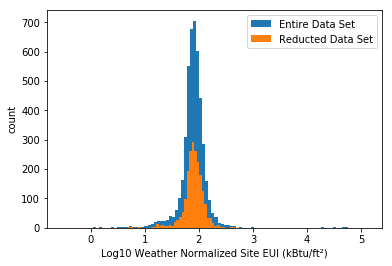

In [0]:
valuetoplotjk = ll84plnum[ll84plnum['Weather Normalized Site EUI (kBtu/ft²)'] > 0.1]
valuetoplot2jk = ll84plred[ll84plred['Weather Normalized Site EUI (kBtu/ft²)'] > 0.1]

valuetoplot = np.log10(valuetoplotjk['Weather Normalized Site EUI (kBtu/ft²)'])
valuetoplot2 = np.log10(valuetoplot2jk['Weather Normalized Site EUI (kBtu/ft²)'])

pl.hist(valuetoplot, 100 )
pl.hist(valuetoplot2, 100 )
pl.legend(["Entire Data Set", "Reducted Data Set"])
pl.xlabel("Log10 Weather Normalized Site EUI (kBtu/ft²)")
pl.ylabel("count")

**Figure 1:** The histogram of the distributions for both the whole data set (*ll84plnum*) and the reducted data(*ll84plred*). As shown from the above analysis, the reducted data set has no significant deviation from the population. Each distribution has the same general shape, so the data wrangling performed had little to no harm on the efficacy on our future results.

# 667 and extyra credit
plot a "scatter matrix" of the selected columns. Identify 4 promising "scaling laws" and plot them separately (a scatter plot of column1 vs column2). Does it make sense that there should be a scaling law between the 2 variables? 

which features should be strongly correlated or identical but are not? discuss

([this](https://stackoverflow.com/questions/26975089/making-the-labels-of-the-scatterplot-vertical-and-horizontal-in-pandas) stackoverflow may come in handy)

## all students
At last, from the original dataset remove only the columns that are NaN in the column "Weather Normalized Site EUI (kBtu/ft²)"


In [0]:
# -- drop buildings for which WN Site EUI is NaN
wnec = "Weather Normalized Site EUI (kBtu/ft²)"
#convert the column wnec into numeric values
ll84pl[wnec] = ll84pl[wnec].apply(pd.to_numeric, errors = 'coerce')
#drop the NaN values
ll84pl_weather = ll84pl.dropna(subset=[wnec])
ll84pl_weather.shape

(4603, 156)

## Analysis: Owner investigation 
### Find owner of the single most energy consuming building

**Find owner of the single most energy consuming building**, as measured by the "Site Weather Normalized EUI per unit area ". 

**Find all the buildings that they own.**


show the weather-normalized site energy consumption and the owner name for the top 30 consuming buildings in Manhattan

In [0]:
#look for the maximum value in the wnec column 
ll84MaxEnergy = ll84pl_weather[ll84pl_weather[wnec]==np.max(ll84pl_weather[wnec])]
ll84MaxEnergy

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
3593,4455.0,2946993.0,St. Mary's Home for Working Girls,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1.014270e+09,1-01427-0011,1043968,225 East 72nd Street,Not Available,10021,225.0,EAST 72 STREET,Manhattan,95267.0,Residence Hall/Dormitory,Residence Hall/Dormitory,Residence Hall/Dormitory,67655.0,Not Available,Not Available,Not Available,Not Available,1960.0,1.0,100.0,Whole Building,Not Available,1,126307.4,126307.4,7.3,0,152001.3,Not Available,Not Available,Not Available,Not Available,Not Available,8543595494,...,9298350.0,2466000.0,9298350.0,1966.0,0.0,0.0,NaN,NaN,10.25,10.0,0.0,10.0,1.0,1.014270e+09,0.0,126.0,995533.0,219627.0,8c,NaN,108S005,10510,NaN,0.0,NaN,NaN,1.0,18v2.1,8.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


The above shows that St. Mary's Home for Working Girls is the most energy consuming building per sqare foot in Manhattan.

In [0]:
#isolate the row of St.Mary's into identification columns
ll84AllOwned = ll84pl_weather[ll84pl_weather["ownername"] == np.max(ll84MaxEnergy["ownername"])]
ll84AllOwned = ll84AllOwned[['Property Name','Parent Property Id','ownername']]
ll84AllOwned

,Property Name,Parent Property Id,ownername
3593,St. Mary's Home for Working Girls,Not Applicable: Standalone Property,ST MARYS HOME FOR GIR


St. Mary's Home for Working Girls is not owned by a major company, falling in the standalone property category

In [0]:
#look for the 30 msot consuming buildings and get theri identifying information
ll84Top30 = ll84pl_weather
ll84Top30[wnec] = ll84Top30[wnec].astype(float)

ll84Top30 = ll84Top30.nlargest(30, wnec)
ll84Top30 = ll84Top30[['Property Name','Parent Property Name','ownername',wnec]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
#display the 30 most consuiming buildings 
ll84Top30

,Property Name,Parent Property Name,ownername,Weather Normalized Site EUI (kBtu/ft²)
3593,St. Mary's Home for Working Girls,Not Applicable: Standalone Property,ST MARYS HOME FOR GIR,126307.4
2962,Rolex Realty Company Inc,Not Applicable: Standalone Property,ROLEX RLTY CO INC,88701.1
3081,950 Third Avenue Company,Not Applicable: Standalone Property,950 THIRD AVENUE LLC,77493.8
2872,4 W 58th Street,Not Applicable: Standalone Property,"58 WEST 58TH UNITS,",57361.3
1971,Manhattan Place Condominium,Not Applicable: Standalone Property,ANTHONY PAUL GIORGIO,54748.3
2869,9 W 57th Street,Not Applicable: Standalone Property,SOLOVIEFF REALTY CO.,51697.6
2838,The Jewel,Not Applicable: Standalone Property,,50621.4
3071,"136 East 56th Street, New York, NY",Not Applicable: Standalone Property,136 E 56TH ST OWNERS,49620.8
2964,Santander Bank New York Building,Not Applicable: Standalone Property,"MIKEONE EK EAST 53, L",32268.7
1865,The Abbey Condominium,Not Applicable: Standalone Property,THE ABBEY CONDOMINIUM,31552.6


The top 30 energy consuming buildings in Manhattan, presented in decreasing order of energy use.

### Find average building consumption by owner 
For all owners that own more than one building, find the average consumption for buildings owned by the same owner. Your dataframe should have 2 columns called _Weather Normalized Site EUI (kBtu/ft²)_	and _counts_

**Who owns the most energy consuming buildings on average?**

**Who owns the most buildings**

In [0]:
#grouping all the properties by their owner's names
ll84AvgEnergyWorking = ll84plOwner[['ownername',wnec]]
testObject = ll84AvgEnergyWorking.groupby('ownername')

#making two separate data frames for the mean of wnec and the count of properties under the same owner
meanFrame = testObject.mean()
countFrame = testObject.count()

#combining into one dataframe
meanFrame.insert(1, 'count',countFrame[wnec])
meanFrame.reset_index()

#removing all owners who have only one property
meanFrame = meanFrame[meanFrame['count'] != 1]

#removing the first 'blank' row
meanFrame = meanFrame.iloc[1:]

meanFrame

,Weather Normalized Site EUI (kBtu/ft²),count
ownername,,
125 PARK OWNER LLC,103.450000,2
1325 FIFTH AVENUE LLC,109.150000,2
161 HOLDING LTD,96.500000,3
2-12 PINEHURST LLC,79.850000,2
207 SHERMAN ASSOCIATE,80.625000,4
207-211 FO LLC,59.200000,2
"32-42 BROADWAY OWNER,",94.750000,2
373-381 PAS ASSOCIATE,684.350000,2
378 WEA OWNER LLC,71.250000,2


In [0]:
HighestAvg = meanFrame[meanFrame[wnec] == np.max(meanFrame[wnec])]
HighestAvg

,Weather Normalized Site EUI (kBtu/ft²),count
ownername,,
COLUMBIA UNIVERSITY,1459.233333,3


In [0]:
HighestCount = meanFrame[meanFrame['count'] == np.max(meanFrame['count'])]
HighestCount

,Weather Normalized Site EUI (kBtu/ft²),count
ownername,,
TRUSTEES OF COLUMBIA,43.086667,45


The result shows that Columbia University owns the most energy consuming buildings on average with.

Finally, TRUSTEES OF COLUMBIA owns the most building in the Manhattan area

# 667 and EC

Universities are big realtors in NYC. The may own by different names. Find all builgings owned by NYU and COLUMBIA. replace the ownename with NYU and COLUMBIA respectively and re-aggregate the data based on these names and again find the owner of the buildings that pon average consume the most, of the highest number of buildings, and that owns the most sq footage 